## Import and split dataset

In [17]:
# Starter code
import pandas as pd
import numpy as np

# Copy this to other notebooks to get the train and test data
# Data is already normalized
def load_train_test():
    train_df = pd.read_csv("./datasets/bike_train.csv", index_col=0)
    test_df = pd.read_csv("./datasets/bike_test.csv", index_col=0)
    X_train = train_df.drop("Count", axis=1).values
    y_train = train_df["Count"]
    X_test = test_df.drop("Count", axis=1).values
    y_test = test_df["Count"]
    return (X_train, X_test, y_train, y_test)
    
X_train, X_test, y_train, y_test = load_train_test()

## Create and train DNN model

In [68]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, Recall

metrics = ['accuracy', Precision(name='precision', thresholds=.5), Recall(name='recall', thresholds=.5)]
ann = Sequential()
ann.add(Dense(units=512, activation='relu'))
ann.add(Dense(units=512, activation='sigmoid'))
ann.add(Dense(units=512, activation='relu'))
ann.add(Dense(units=1, activation='linear'))
ann.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

In [69]:
history = ann.fit(X_train, y_train, epochs=200, validation_split=0.2)

8 - val_mse: 53562.2148 - val_mae: 151.3090
Epoch 94/200
154/154 [==============================] - 1s 3ms/step - loss: 45257.6680 - mse: 45257.6680 - mae: 134.0566 - val_loss: 53454.9141 - val_mse: 53454.9141 - val_mae: 149.2444
Epoch 95/200
154/154 [==============================] - 1s 3ms/step - loss: 44175.2188 - mse: 44175.2188 - mae: 133.8445 - val_loss: 50398.4922 - val_mse: 50398.4922 - val_mae: 141.8526
Epoch 96/200
154/154 [==============================] - 0s 3ms/step - loss: 41883.9883 - mse: 41883.9883 - mae: 128.8792 - val_loss: 55162.2227 - val_mse: 55162.2227 - val_mae: 143.4966
Epoch 97/200
154/154 [==============================] - 0s 3ms/step - loss: 43626.5156 - mse: 43626.5156 - mae: 130.7796 - val_loss: 51983.5898 - val_mse: 51983.5898 - val_mae: 146.9309
Epoch 98/200
154/154 [==============================] - 1s 3ms/step - loss: 42207.9219 - mse: 42207.9219 - mae: 129.7238 - val_loss: 50072.7188 - val_mse: 50072.7188 - val_mae: 138.6678
Epoch 99/200
154/154 [====

## Plot stats

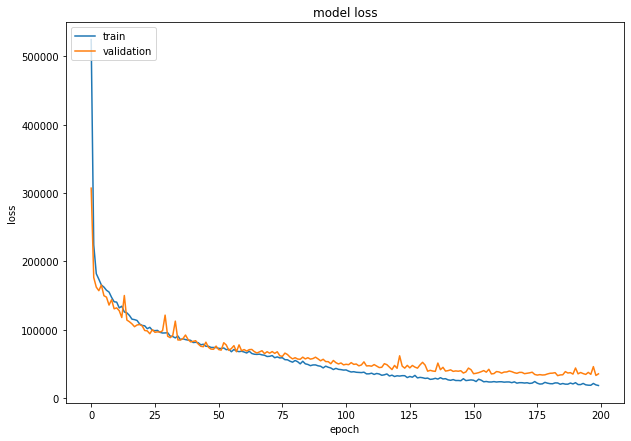

In [70]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

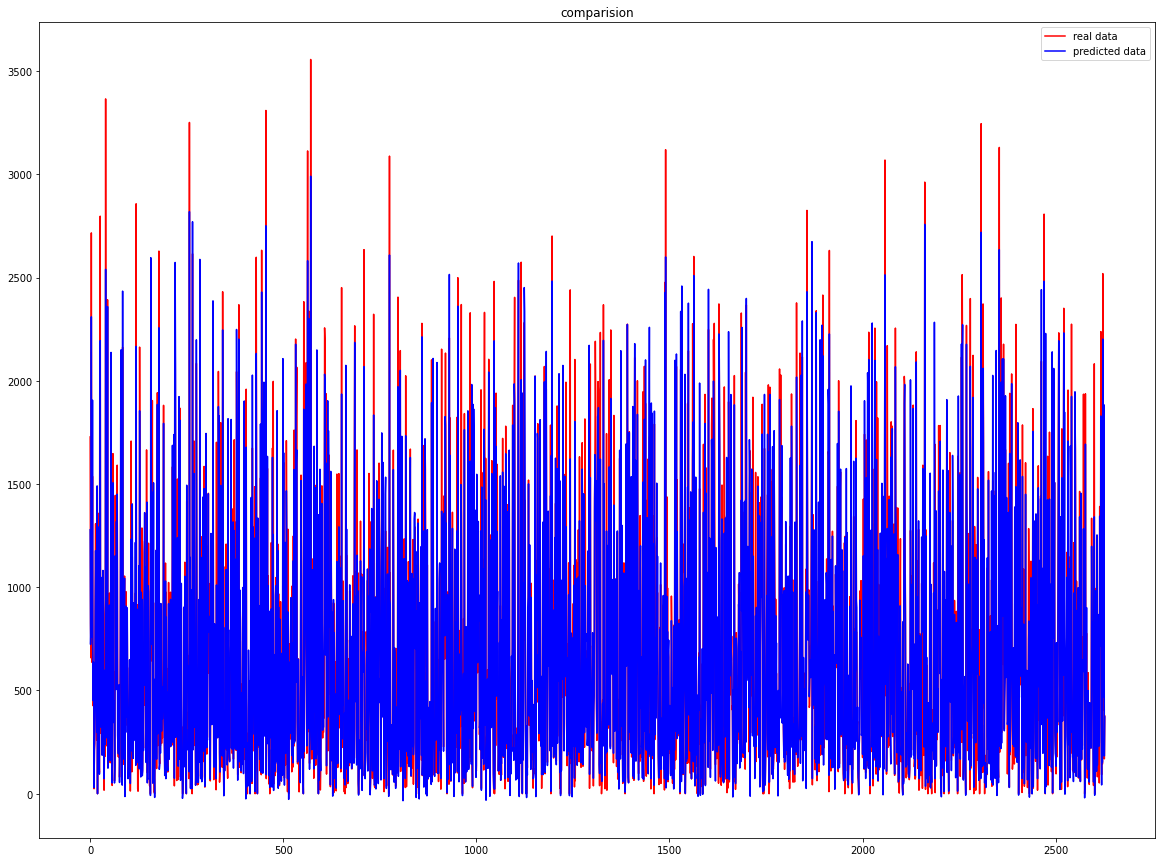

In [71]:
y_pred = ann.predict(X_test)

plt.subplots(figsize=(20,15))
plt.plot(y_test, color='red', label='real data')
plt.plot(y_pred, color='blue', label='predicted data')
plt.title('comparision')
plt.legend()
plt.show()